**Seungjae Lee and Michael Yu**

Fall 2019

CS343: Neural Networks

Project 1: Single layer networks

**FINAL DUE 11:59pm Thurs Sept 19**
- `binary_classification.ipynb` (this notebook)
- `adaline.py`
- `adaline_logistic.py`
- `binary_regression.ipynb`

**REMINDER**: Submit rubric on Google Classroom

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from adaline import Adaline

# Set the color style so that Professor Layton can see your plots
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
# Make the font size larger
plt.rcParams.update({'font.size': 20})

# Turn off scientific notation when printing
np.set_printoptions(suppress=True, precision=3)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

### Reminders

- In this class, use `numpy ndarray` (`np.array()`), not Numpy Matrix.
- To safeguard against data loss when working in a jupyter notebook, make sure the notebook is `Trusted` (Top right corner of notebook). This will ensure your work autosaves. **I still recommend manually saving at least every few minutes with (Control+S / Cmd+S)**

## Goals

In this project, you will implement a single-layer neural network that includes the same fundamental components as larger multi-level networks.

**The goals are to:**

- Get familar with Jupyter notebooks, Numpy arrays, Pandas.
- Get familar with the workflow for preprocessing data, training a neural network, evaluating test data, and examining performance metrics.
- Analyze and visualize the decision boundaries formed by single-layer networks.
- Use a similar neural network architecture for classification and for regression.
- Work with multiple datasets.

## Task 1) Implement the ADAptive LInear NEuron (ADALINE) network for binary classification


In Task 1, complete the methods of the `Adaline` class in `adaline.py`. This includes:

- `net_input(self, features)`
- `activation(self, net_in)`
- `compute_loss(self, errors)`
- `compute_accuracy(self, y, y_pred)`
- `gradient(self, errors, features)`

- `predict(self, features)`
- `fit(self, features, y)`

**Important:** Before starting, read through the method descriptions and expected inputs/outputs. It probabily woud be a good idea to tackle simpler/smaller methods first, then use them in more complex ones. For example it may be a good idea to work on `net_input` first because it is required to complete `fit`.

Here is a summary of the ADALINE network equations

##### Net input

$$\text{netIn} = \sum_{i=1}^M x_i w_i + b$$

##### Net activation

$$f(x) = x$$

##### Loss: Sum of squared error

$$L(\vec{w}) = \frac{1}{2} \sum_{i=1}^N \left ( y_i - \text{netAct}_i \right )^2 $$

##### Gradient (bias)

$$\frac{\partial L}{\partial b} = \sum_{i=1}^N \left ( y_i - \text{netAct}_i \right )$$

##### Gradient (wts)

$$\frac{\partial L}{\partial w_j} = \sum_{i=1}^N \left ( y_i - \text{netAct}_i \right ) x_j$$

##### Gradient descent (delta rule)

$$b(t+1) = b(t) + \eta \frac{\partial L}{\partial b}$$
$$w_j(t+1) = w_j(t) + \eta \frac{\partial L}{\partial w_j}$$

above $\eta$ is the learning rate, and $N$ is the training set (number of data samples in training epoch).

### a. Test your ADALINE implementation

In [2]:
net = Adaline()

#### Test `loss` function

In [3]:
np.random.seed(0)
randErrors = np.array([-0.835,  0.322, -0.381,  0.496, -0.89 , -0.953])
net_act = np.random.rand(len(randErrors))
debugLoss = net.compute_loss(randErrors, net_act)
print(f'Your loss is {debugLoss} and it should be 3.6609344768925496')

Your loss is 3.6609344768925496 and it should be 3.6609344768925496


#### Test `accuracy` function

In [4]:
randClasses1 = np.where(randErrors >= 0, 1, -1)
randClasses2 = np.roll(randClasses1, 1)
acc1 = net.compute_accuracy(randClasses1, randClasses1)
acc2 = net.compute_accuracy(randClasses1, randClasses2)
print(f'Test 1: Your accuracy is {acc1} and it should be 1.0')
print(f'Test 2: Your accuracy is {acc2} and it should be 0.33333333333333337')

Test 1: Your accuracy is 1.0 and it should be 1.0
Test 2: Your accuracy is 0.33333333333333337 and it should be 0.33333333333333337


#### Test `gradient` function

In [5]:
np.random.seed(0)
randFeatures = np.random.normal(loc=0, scale=1, size=(10,3))
randErrors1 = np.random.normal(loc=0, scale=1, size=(10,))
randBiasGrad, randWtGrad = net.gradient(randErrors1, randFeatures)
print(f'Test 1: Your bias gradient is {randBiasGrad} and it should be -0.7839944892482784')
print(f'Test 2: Your wt gradient is {randWtGrad} and it should be [-0.4    0.897 -7.689]')

Test 1: Your bias gradient is -0.7839944892482784 and it should be -0.7839944892482784
Test 2: Your wt gradient is [-0.4    0.897 -7.689] and it should be [-0.4    0.897 -7.689]


#### Test `predict` function

In [6]:
np.random.seed(0)
inputs = np.random.randn(10, 5)
net.wts = np.random.randn(6)
y_pred = net.predict(inputs)
print(f'Your predicted classes are {y_pred}.\n            They should be [-1 -1 -1 -1 -1 -1 -1 -1  1 -1]')

Your predicted classes are [-1 -1 -1 -1 -1 -1 -1 -1  1 -1].
            They should be [-1 -1 -1 -1 -1 -1 -1 -1  1 -1]


#### Test `fit` function

In [7]:
np.random.seed(0)
net = Adaline()
inputs = np.random.randn(10, 5)
y = np.sign(np.random.randn(10))
loss, acc = net.fit(inputs, y)
print(net.net_input(inputs)[:5])
print(f'Your end-of-training loss / accuracy are\n{loss[-1]} / {acc[-1]}.\nThey should be\n3.944874887550384 / 0.6')
print(f'Your wts after training are:\n{net.get_wts()}\nand should be\n[-0.298 -0.033  0.33  -0.382 -0.192  0.087]')

[-0.866  0.162 -0.098  0.128  0.014]
Your end-of-training loss / accuracy are
3.9448748875503834 / 0.6.
They should be
3.944874887550384 / 0.6
Your wts after training are:
[-0.298 -0.033  0.33  -0.382 -0.192  0.087]
and should be
[-0.298 -0.033  0.33  -0.382 -0.192  0.087]


### b. Load in and preprocess old faithful data

Write code to do the following in the below cell.

- Load in `old_faithful.csv`, represent data using a ndarray. Shape = [Num samps, Num features] = [272, 2].
- Assign the output classes (**severe**) to a separate 1D ndarray vector. Shape=(272,)
- Preprocess the data by normalizing by the global maximum. I.e. the max value over all features in the transformed dataset should be 1.0. Stated a different way, only one feature component of one data sample vector equals 1.0, everything else is smaller.
- Use matplotlib to create a scatter plot of the normalized data, color-coding data points according to their class
- I suggest using pandas, but you're welcome to do this however you like.
- **Make sure that executing the below cell results in an inline scatter plot, color-coded by class.**

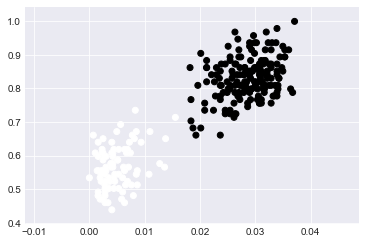

In [8]:
df = np.loadtxt('old_faithful.csv', delimiter=',', usecols=(1, 2), skiprows = 1)
y = np.loadtxt('old_faithful.csv', delimiter=',', usecols=(3), skiprows = 1)
x = (df - np.min(df))/(np.max(df)-np.min(df))
plt.scatter(x[:,0], x[:,1], c = y)
plt.show()



### c. Train ADALINE on normalized Old Faithful data using default hyperparameters (i.e. learning rate, epochs)

By the final epoch, training loss should reach ~23.74 and accuracy ~97%.

In [9]:
net = Adaline()
loss, acc = net.fit(x, y)
print(f'At the end of training, your loss is {loss[-1]:.2f} and accuracy is {acc[-1]:.2f}')

At the end of training, your loss is 23.68 and accuracy is 0.97


- Use the provided function to plot your training results inline in the below cell.

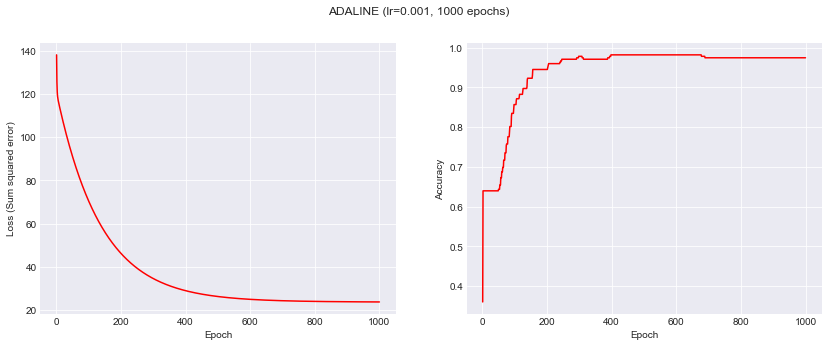

In [10]:
def plot_adaline_train(net, loss_list, acc_list, plotMarkers=False):
    n_epochs = net.get_num_epochs()
    lr = net.get_learning_rate()
    
    x = np.arange(1, n_epochs+1)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'ADALINE (lr={lr}, {n_epochs} epochs)')
    
    curveStr = '-r'
    if plotMarkers:
        curveStr += 'o'
    
    
    ax1.plot(x, loss_list, curveStr)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (Sum squared error)')
    ax2.plot(x, acc_list, curveStr)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    
    plt.show()
plot_adaline_train(net, loss, acc)

#### Questions

Create a cell immediately below this one to answer questions in project notebooks.

1. Based on your loss and accuracy curves, does it look like your network learned to classify the old faithful data? Why or why not?

#### Answers

1. Yes, our loss and accuracy curves feature the expected shape. The graph shows that we were able to minimize our loss while increase our accuracy as the epochs increased. 

### d. Early stopping

A common practice to speed up training is to stop training early (before the prescribed number of epochs is completed) if the loss stops changing (within some criterion level). You will modify the `fit` training function to implement this feature.

Add two optional parameters to `fit`:
- `early_stopping=False`
- `loss_tol=0.1`

In this subtask, implement the following:
- if `early_stopping` is True, terminate the training process if the difference in loss between the previous and current epoch is `< loss_tol`. This means that the loss has converged before the pre-specified number of training epochs.
- Set the number of training epochs to be large (2000). Determine the number of epochs required for the loss to converge.

In [11]:
net = Adaline(2000)
loss, acc = net.fit(x, y, early_stopping = True)
print(loss[-1])

Exiting at epoch  268
37.28719716897933


#### Question

2. How many epochs did it take to train the network with the early stopping tolerance of 0.1?
3. At what approximate loss value does the network converge to when stopping early?

#### Answer

2. 268
3. Around 37.279

## Task 2) Feature scaling and convergence

**Important:** For this task, disable early stopping  in `fit`!

### a. Feature scaling

Copy your code from Task 1 to import the old faithful data, but this time don't normalize before training.

In [12]:
df = np.loadtxt('old_faithful.csv', delimiter=',', usecols=(1, 2), skiprows = 1)
y = np.loadtxt('old_faithful.csv', delimiter=',', usecols=(3), skiprows = 1)
net = Adaline()
loss, acc = net.fit(df, y)
print(f'At the end of training, your loss is {loss[-1]:.2f} and accuracy is {acc[-1]:.2f}')

At the end of training, your loss is nan and accuracy is 0.36


c:\users\mwill\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\mwill\Documents\Neural Networks\Project 1.3\adaline.py:97: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(y - net_act))*1/2
C:\Users\mwill\Documents\Neural Networks\Project 1.3\adaline.py:134: RuntimeWarning: overflow encountered in matmul
  return np.sum(errors), features.T@errors
C:\Users\mwill\Documents\Neural Networks\Project 1.3\adaline.py:196: RuntimeWarning: invalid value encountered in add
  self.wts[1:] = self.wts[1:] + self.lr*wtsGrad
C:\Users\mwill\Documents\Neural Networks\Project 1.3\adaline.py:150: RuntimeWarning: invalid value encountered in greater_equal
  return np.where(self.activation(self.net_input(features)) >= 0, +1, -1)


#### Questions

4. What happens to the loss when we don't normalize the features before training? Why?

#### Answer

4. The loss kept increasing until it became a value too high for the program to comprehend, resulting in a value "nan". If we didn't normalize our features, our net_in and net_act will have a very wide range. This could complicate our loss function, which would mess up how the net updates the weights. 

### b. Test how individually standardizing your features affects the rate at which loss decreases over epochs

- Write code in the cell below to train the network on standardized features. Recall that standardizing a variable means applying the transformation $\frac{x - \mu}{\sigma}$
- Plot the loss and accuracy and **explain how they compare with findings from Task 1**

**The cell should generate an inline pair of plots when executed**.

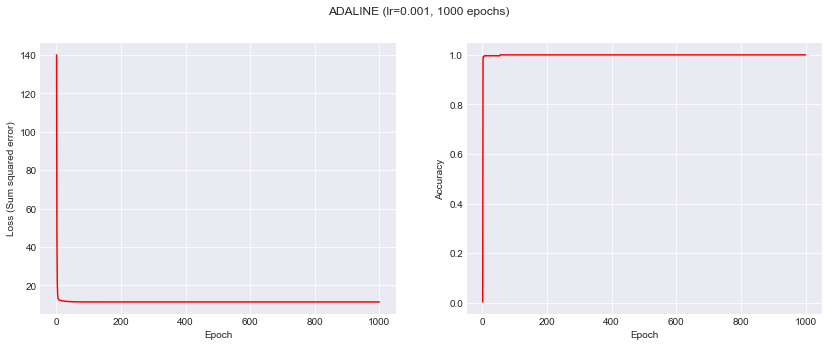

In [13]:
df = np.loadtxt('old_faithful.csv', delimiter=',', usecols=(1, 2), skiprows = 1)
y = np.loadtxt('old_faithful.csv', delimiter=',', usecols=(3), skiprows = 1)

x = (df - np.mean(df, axis=0))/np.std(df, axis=0)
net = Adaline()
loss, acc = net.fit(x, y)

plot_adaline_train(net, loss, acc)

#### Questions

5. Explain the similarities/differences in loss and accuracy curves between these plots and those that you made in Task 1.

#### Answer

5. The loss and accuracy curves both have the same shapes as the one in Task 1. The loss graphs both decrease until it plateaus and accruacy graphs both increases until it also plateaus. What is different is the rate of change. In the standardized features, we see that the loss and accuracy graphs reaches to an appropriate loss and accuracy much faster, to the point where it looks like a ninety degrees edge. This means that the standardized features were much faster at getting the appropriate weights than the normalized features. 

### c. Visualize class boundaries

For this subtask, you will plot the boundary between points (`eruptions`, `waiting` feature pairs) that get classified as severe (+1) or not (-1). To get there, fill in the blanks and answer the questions below.

In [14]:
# Here are the learned weights.
wts = net.get_wts()
wts

array([0.279, 0.704, 0.229])

#### Questions

6. What do each of the above learned weights mean in the context of our dataset? Hint: Look at your `net_in` equation, look at the features that you feed into the model, look at the scatterplot you made in 1b, think about what features are present in a single training sample.
7. Which feature / weight index corresponds to the "y axis value" in your scatterplot from 1b?

#### Answer

6. The first weight is our bias, the second weight is for eruptions, and the third weight is for waiting. We compute our net_in by taking the sum of multiplying the weights by the features 
7. Waiting 

#### Transform weights for plotting

The class boundary equation is $0 = w_0 + w_1 \times x_i + w_2 \times y_i$ for sample $i$ in our data ($i$ goes to 272).

But to plot it, we want an equation that looks like $y_i = m \times x_i + b$ where $m$ and $b$ are some combinations of our weights.

- Scale the weights so that the one corresponding to the "y value" is set to 1, then (by hand) solve for $y$. Once you do, adjust the sign/scale of your weights in code so they match up with the equation you wrote out by hand ( of form $y_i = m \times x_i + b$).
- Once you're done, have the cell below print your transformed weights.

In [15]:
wts = net.get_wts()
print("old weights", wts)

scale = 1/wts[2]
new_wts = wts*scale
print("new weights",new_wts)
# yi = -m*xi - b
#y_i = -new_wts[0] -new_wts[1]*df[:,0]
#print(y_i)
# TODO: Adjust weights for plotting, then print them here

old weights [0.279 0.704 0.229]
new weights [1.221 3.076 1.   ]


- The below code samples 50 equally spaced x values from -1.5 to 1.5 for plotting the class boundary. Given the `x_i` values, generate `y_i` values using the equation $y_i = m \times x_i + b$ (using your transformed weights from above). 

**Executing the code below should produce a graph that clearly shows this class boundary.**

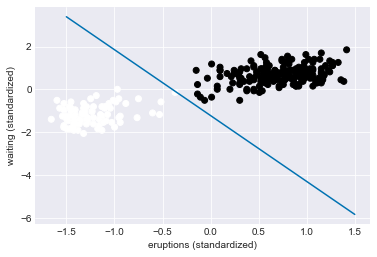

In [16]:
# lower and upper bounds for x values of decision curve when plotting in normalized coordinates
low, high = -1.5, 1.5

# Generate 50 equally spaced x-values that we will plug into the equation for the decision boundary curve
# to get the corresponding y-value on the curve
x_i = np.linspace(low, high)
# TODO: Compute y_i here
y_i = -new_wts[0] - new_wts[1]*x_i

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.plot(x_i, y_i)
plt.xlabel('eruptions (standardized)')
plt.ylabel('waiting (standardized)')
plt.show()

## Task 3) Hyperparameters and grid search

This task focuses on the influence of learning rate (a model **hyperparameter**) on the quality of neural network training.

For this task, use the standardized Old Faithful features for input.

### a. Influence of learning rate on learning

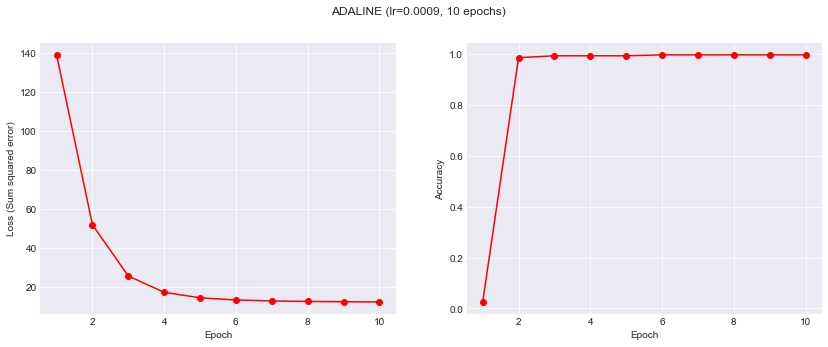

In [17]:
net = Adaline(lr=0.0009, n_epochs=10)
loss, acc = net.fit(x, y)
plot_adaline_train(net, loss, acc, plotMarkers=True)

#### Questions

8. Make small changes to the learning rate hyperparameter above. How does it affect the loss?
9. What happens if the learning rate is increased by several orders of magnitude? How does it affect the loss? Can you explain why?

#### Answer

8. At the original loss of 0.0001, the loss graph was almost a straight line, although you can make out a very slight downward curve to it. As I increased the loss by 0.0001, the loss graph became more of a curve that resembled a decreasing exponential function. Also, as I slightly increased the learning rate, the final loss was also smaller. 
9. Around a loss of 0.004 and higher, the loss increases as the number of epochs increase. As we continually increase the learning rate, the loss explodes to an extremely high number. With the loss of 0.004, we saw the loss shoot up to just below 400. With a loss of 0.0041, the loss goes to nearly a 1000. If the learning rate is too high, we might skip around the gradient to the point where the model loses control and jumps to extremely high numbers instead of making its way to the lowest point.  

### b. Grid search

How can we determine a "good" value of the learning rate that doesn't result in pathological training behavior? Before, we were just guessing / eye-balling it. 

One common, simple approach is to perform a **grid search** through the parameter space. We select with a lower bound value for the parameter and walk through the parameter space in equal steps until we hit a upper bound value. After the search concludes, we set the parameter value for "real simulations" to the value that "worked best" according to some criteria we're interested in optimizing during the grid search.

**TODO:** Use grid search to find the highest learning rate that still lowers loss as a function of epoch (i.e. below this value, the loss decreases as a function of epoch, above this critical value, loss increases as a function of epoch). Find the value with precision of at least 1e-3 (10^-3). **Write all your code below and the learning rate that you find in the cell below** — do NOT modify the `Adaline` class.

**Tips:**
- Define lower and upper bound values for the parameter search, informed by your explorations in 3a.
- Define a step size at least as small as your starting value. Your simulation shouldn't last more a few seconds.
- There is a `set_learning_rate` method
- Keep the number of epochs small (e.g. 10) to keep simulation time reasonable
- Remember that you are outputting the entire loss history when you execute `fit`.


In [18]:
upper = 0.004
lower = 0.0002
step_size = 0.0002
steps = int((upper - lower)/step_size)

net = Adaline(lr = lower, n_epochs = 10)
rate = lower
for i in range(steps):
    loss, acc = net.fit(x, y)
    print("lr: ", round(rate, 5))
    print("loss: ", round(loss[-1],5))
    rate = rate + step_size
    net.set_learning_rate(rate)

lr:  0.0002
loss:  32.39111
lr:  0.0004
loss:  15.3901
lr:  0.0006
loss:  13.16802
lr:  0.0008
loss:  12.47698
lr:  0.001
loss:  12.33037
lr:  0.0012
loss:  12.14595
lr:  0.0014
loss:  12.01622
lr:  0.0016
loss:  11.98083
lr:  0.0018
loss:  11.96583
lr:  0.002
loss:  11.92317
lr:  0.0022
loss:  11.91985
lr:  0.0024
loss:  11.81206
lr:  0.0026
loss:  11.76947
lr:  0.0028
loss:  11.74538
lr:  0.003
loss:  11.69637
lr:  0.0032
loss:  11.68965
lr:  0.0034
loss:  12.40655
lr:  0.0036
loss:  19.33863
lr:  0.0038
loss:  69.99194


#### Questions

10. What is the critical learning rate value above which loss starts to increase?

#### Answer

10. After a loss of around 0.003, the loss begins to increase as the learning rate increases. 